In [1]:
import numpy as np
import seaborn as sns
import statistics as st
import scipy.stats as st1

In [2]:
data=sns.load_dataset('mpg')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
random_sample=data.sample(10)
random_sample

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
24,21.0,6,199.0,90.0,2648,15.0,70,usa,amc gremlin
251,20.2,8,302.0,139.0,3570,12.8,78,usa,mercury monarch ghia
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel
227,19.0,6,225.0,100.0,3630,17.7,77,usa,plymouth volare custom
337,32.4,4,107.0,72.0,2290,17.0,80,japan,honda accord
87,13.0,8,350.0,145.0,3988,13.0,73,usa,chevrolet malibu
134,16.0,6,258.0,110.0,3632,18.0,74,usa,amc matador
259,20.8,6,200.0,85.0,3070,16.7,78,usa,mercury zephyr


In [4]:
data.iloc[np.arange(0,len(data),step=20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
20,25.0,4,110.0,87.0,2672,17.5,70,europe,peugeot 504
40,14.0,8,351.0,153.0,4154,13.5,71,usa,ford galaxie 500
60,20.0,4,140.0,90.0,2408,19.5,72,usa,chevrolet vega
80,22.0,4,122.0,86.0,2395,16.0,72,usa,ford pinto (sw)
100,18.0,6,250.0,88.0,3021,16.5,73,usa,ford maverick
120,19.0,4,121.0,112.0,2868,15.5,73,europe,volvo 144ea
140,14.0,8,304.0,150.0,4257,15.5,74,usa,amc matador (sw)
160,17.0,6,231.0,110.0,3907,21.0,75,usa,buick century
180,25.0,4,121.0,115.0,2671,13.5,75,europe,saab 99le


In [5]:
print(data['origin'].unique())
da=data.groupby('origin').apply(lambda x: x.sample(3))
dat=data.groupby('origin').apply(lambda x: x.sample(frac=0.1))
dat['origin'].value_counts()

['usa' 'japan' 'europe']


origin
usa       25
japan      8
europe     7
Name: count, dtype: int64

193.42587939698493

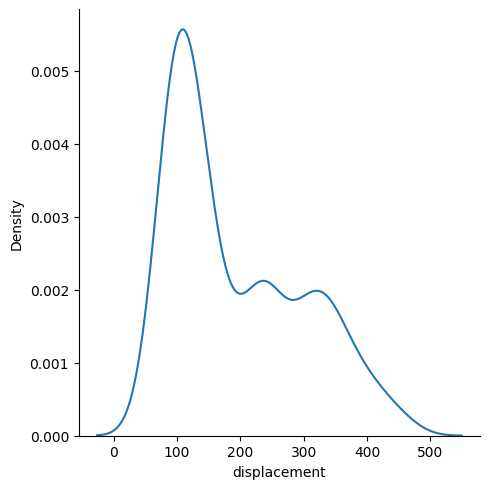

In [6]:
sns.displot(data['displacement'],kind='kde')
data['displacement'].mean()

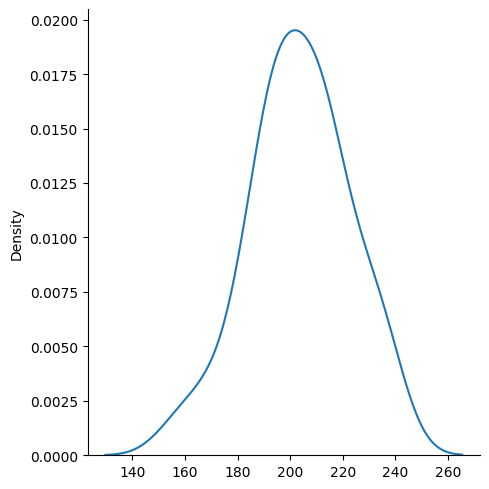

In [7]:
rand_list=[]
rand=data['displacement'].sample(30)
for i in range(0,30):
    temp=data['displacement'].sample(30)
    rand_list.append(temp.mean())
st.mean(rand_list)
sns.displot(rand_list,kind='kde')

    

In [8]:
#confidence interval
# t dis.
print(st1.t.interval(.95,10,np.mean(data['displacement']),st1.sem(data['displacement'])))
#z dis
st1.norm.interval(0.95,np.mean(data['displacement']),st1.sem(data['displacement']))

(181.78034520207032, 205.07141359189953)


(183.18198118452224, 203.6697776094476)

In [9]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
import scipy

In [10]:
mean_iq=100
sd_iq=15/math.sqrt(50)
alpha=0.5
null_mean=100
data=sd_iq*randn(50)+mean_iq
ztest_score,p_value=ztest(data,value=null_mean,alternative='larger')
print(p_value)
if p_value<alpha:
    print("reject null hypothesis")
else:
    print("fail to reject")



0.24308157058296503
reject null hypothesis


In [11]:
def ztest(mean,pop_mean,n,sd,alpha):
    z_score=(mean-pop_mean)/(sd/math.sqrt(n))
    p_value=scipy.stats.norm.sf(z_score)
    print(z_score,p_value)
    if p_value<alpha:
        print("rejct null hypothesis")
    else:
        print("fail to reject")
    

In [12]:
ztest(110,100,50,15,0.05)

4.714045207910317 1.2142337364879197e-06
rejct null hypothesis


In [13]:
#chi square
from scipy.stats import chisquare
chisquare([40,26,24])

Power_divergenceResult(statistic=5.066666666666666, pvalue=0.07939393227707821)

In [14]:
from  scipy.stats import chi2_contingency
data=[[207,282,241],[234,242,232]]
stats,p,d0f,expected=chi2_contingency(data)
alpha=0.05
if p<alpha:
    print("rejected")
else:
    print("not rejected h0")

not rejected h0


In [15]:
from  sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data=load_iris()
x=data.data
y=data.target
chi2_feature=SelectKBest(chi2,k=2)
x_best=chi2_feature.fit_transform(x,y)
print(x_best)


[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [16]:
from scipy.stats import f_oneway
e=[2,4,2]
m=[2,3,4]
s=[1,2,5]
stats,p=f_oneway(e,m,s)
alpha=0.05
if p<alpha:
    print("reject null hypothesis")
else:
    print("fail to reject")

fail to reject


In [17]:
import numpy as np
import pandas as pd


In [18]:
data=pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15),
						'Watering': np.repeat(['daily', 'weekly'], 15),
						'height': [14, 16, 15, 15, 16, 13, 12, 11, 14,
									15, 16, 16, 17, 18, 14, 13, 14, 14,
									14, 15, 16, 16, 17, 18, 14, 13, 14,
									14, 14, 15]})
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols(
	'height ~ C(Fertilizer) + C(Watering) +\
	C(Fertilizer):C(Watering)', data=data).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(Fertilizer),4.390651e-13,1.0,1.589719e-13,1.000000
C(Watering),8.630952e-02,1.0,3.125000e-02,0.860956
C(Fertilizer):C(Watering),3.333333e-02,1.0,1.206897e-02,0.913305
Residual,7.733333e+01,28.0,NaN,NaN
